In [1]:
from Network import Network
from EntropyMaximisation import backward_entropy_maximisation, forward_entropy_maximization

import numpy as np

# Example network

Here, we try our implementation of EMARB on the example network from Xie and Nie's paper

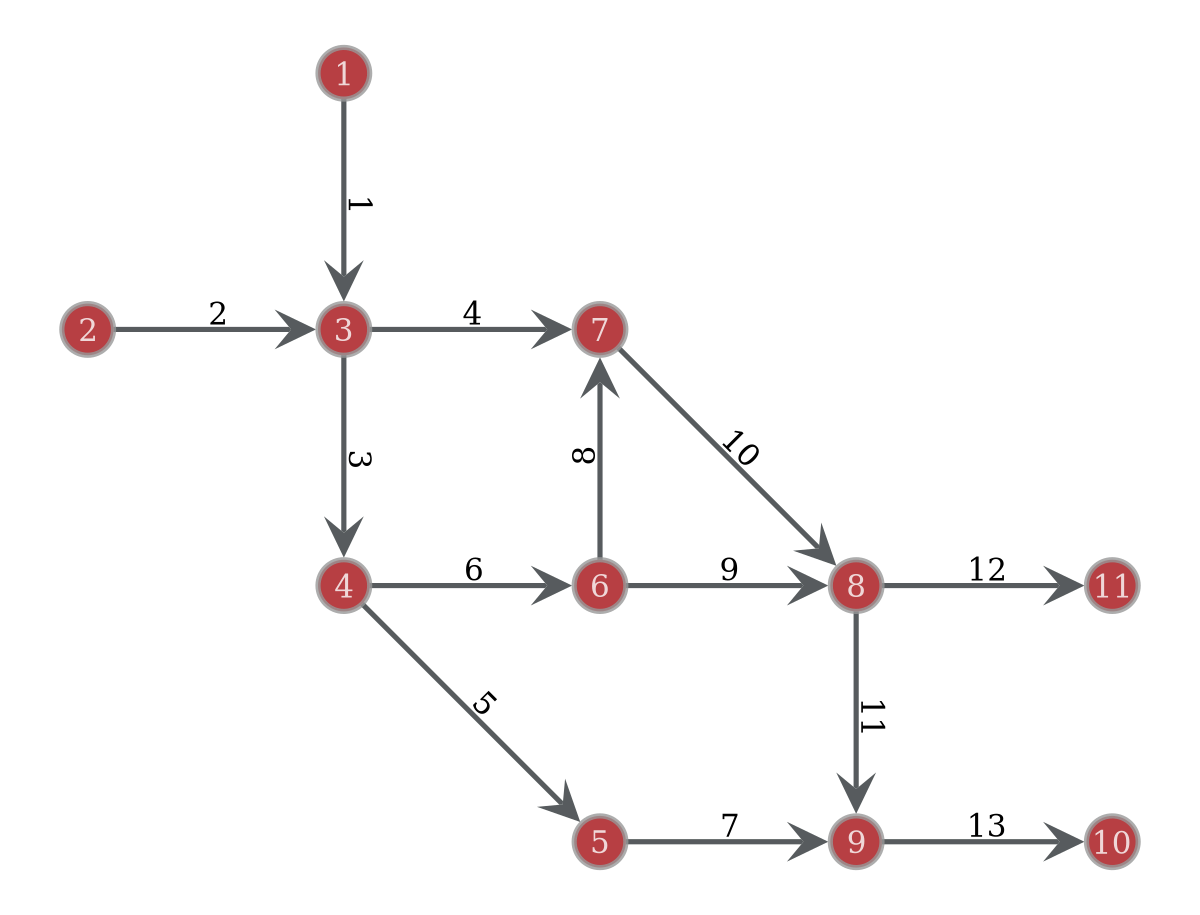

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fda005838c0, at 0x7fda012f1b20>

In [ ]:
net = Network("Example_network") # In order to run, needs to have the files associated with the network in TransportationNetworks/Example_network/
net.draw()

In [3]:
OD = np.zeros((net.num_vertices(), net.num_vertices()))
OD[0,9] = 200
OD[0, 10] = 160
OD[1, 9] = 80
OD[1, 10] = 40
OD

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200., 160.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.,  40.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [4]:
edges_indices = net.get_edges([net.edge_index])
edges_indices[:, :2] +=1
edges_indices

array([[ 1,  3,  0],
       [ 2,  3,  1],
       [ 3,  4,  2],
       [ 3,  7,  3],
       [ 4,  5,  4],
       [ 4,  6,  5],
       [ 5,  9,  6],
       [ 6,  7,  7],
       [ 6,  8,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 8, 11, 11],
       [ 9, 10, 12]])

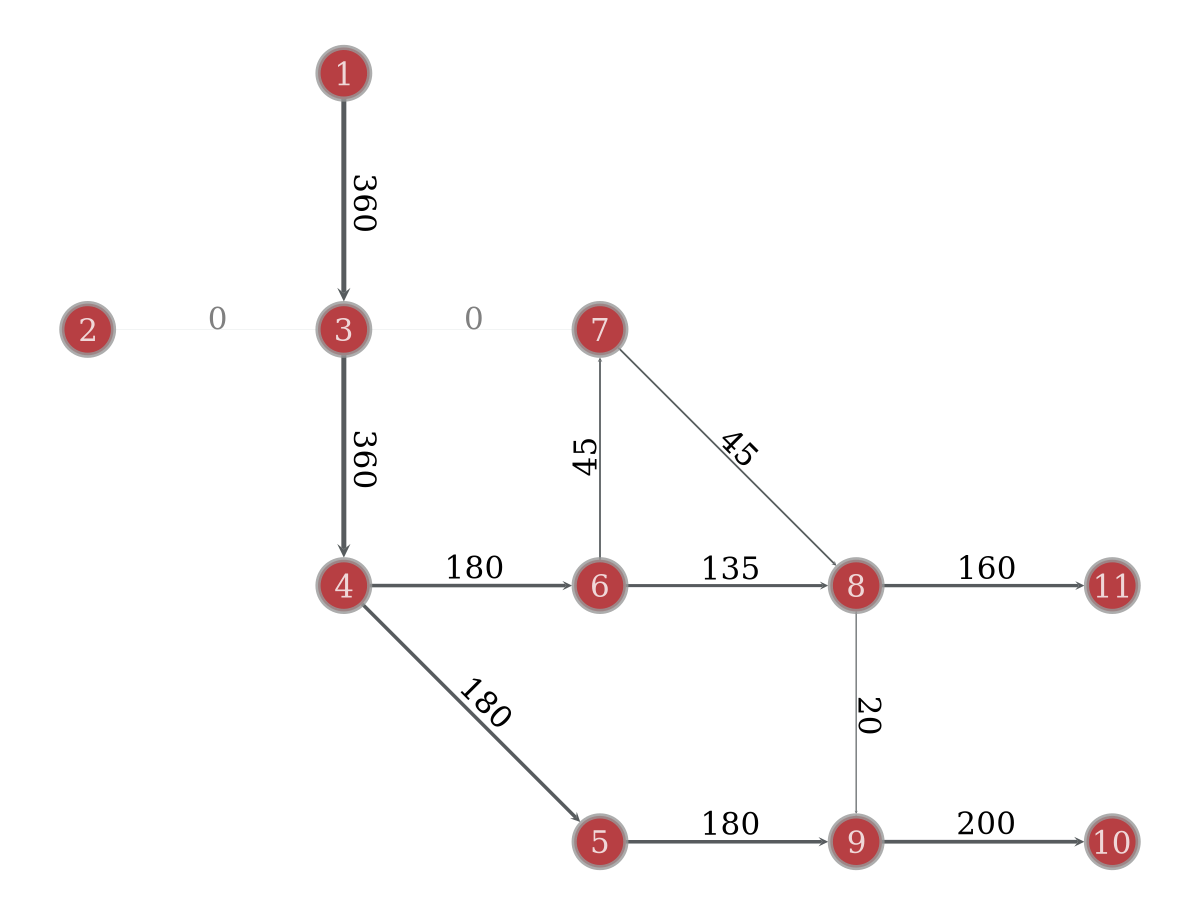

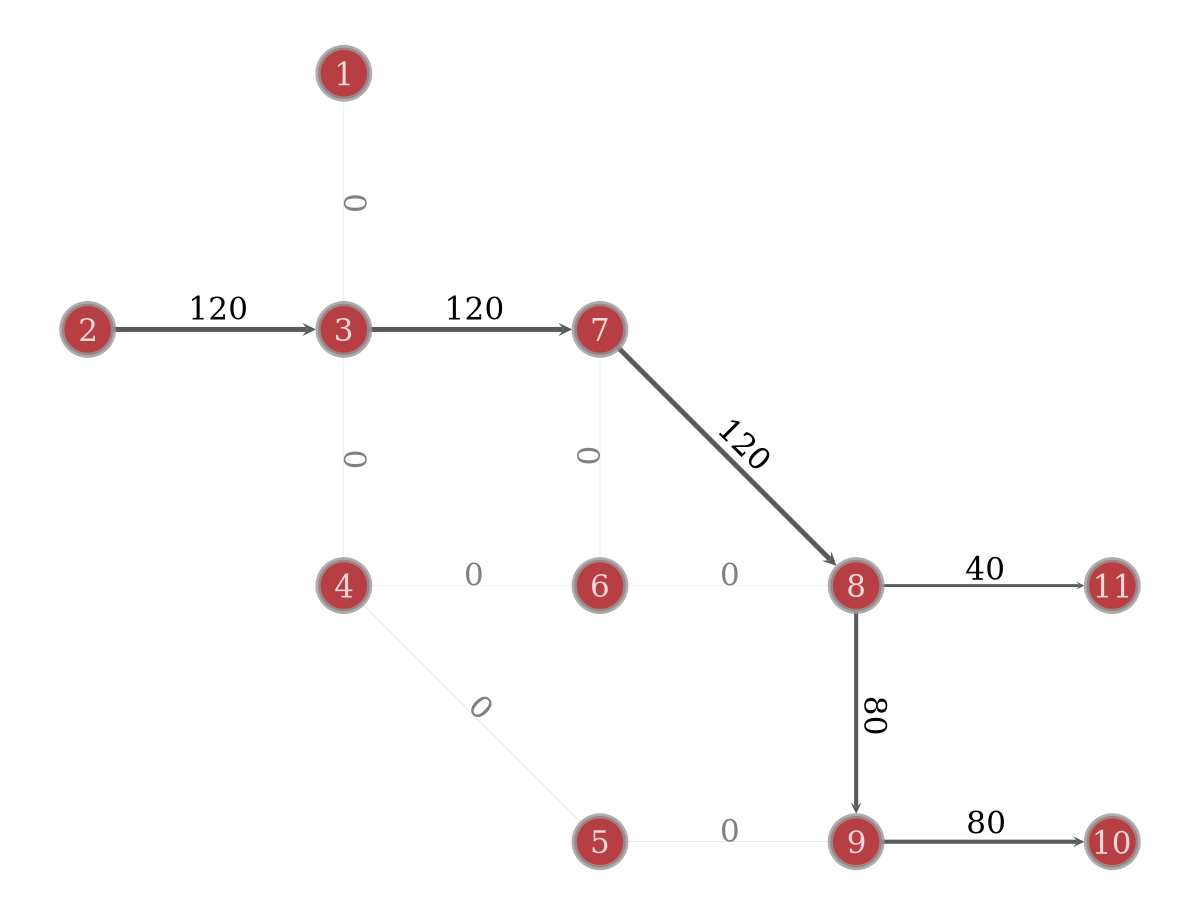

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fda005838c0, at 0x7fda75b8fbf0>

In [5]:
flows_by_o = net.new_edge_property("vector<float>", vals=np.zeros((net.num_edges(), net.num_vertices())))
a = flows_by_o.get_2d_array()
a[0] = [360, 0, 360, 0, 180, 180, 180, 45, 135, 45, 20, 160, 200]
a[1] = [0, 120, 0, 120, 0, 0, 0, 0, 0, 120, 80, 40, 80]
flows_by_o.set_2d_array(a)
net.draw(flows_by_o=flows_by_o, o=1)
net.draw(flows_by_o=flows_by_o, o=2)

In [6]:
x_n, residuals = backward_entropy_maximisation(net, flows_by_o, 7)
new_flows = forward_entropy_maximization(net, x_n, residuals, 8)

/home/ars/Braess-Links-Identification2/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


'Graph E'

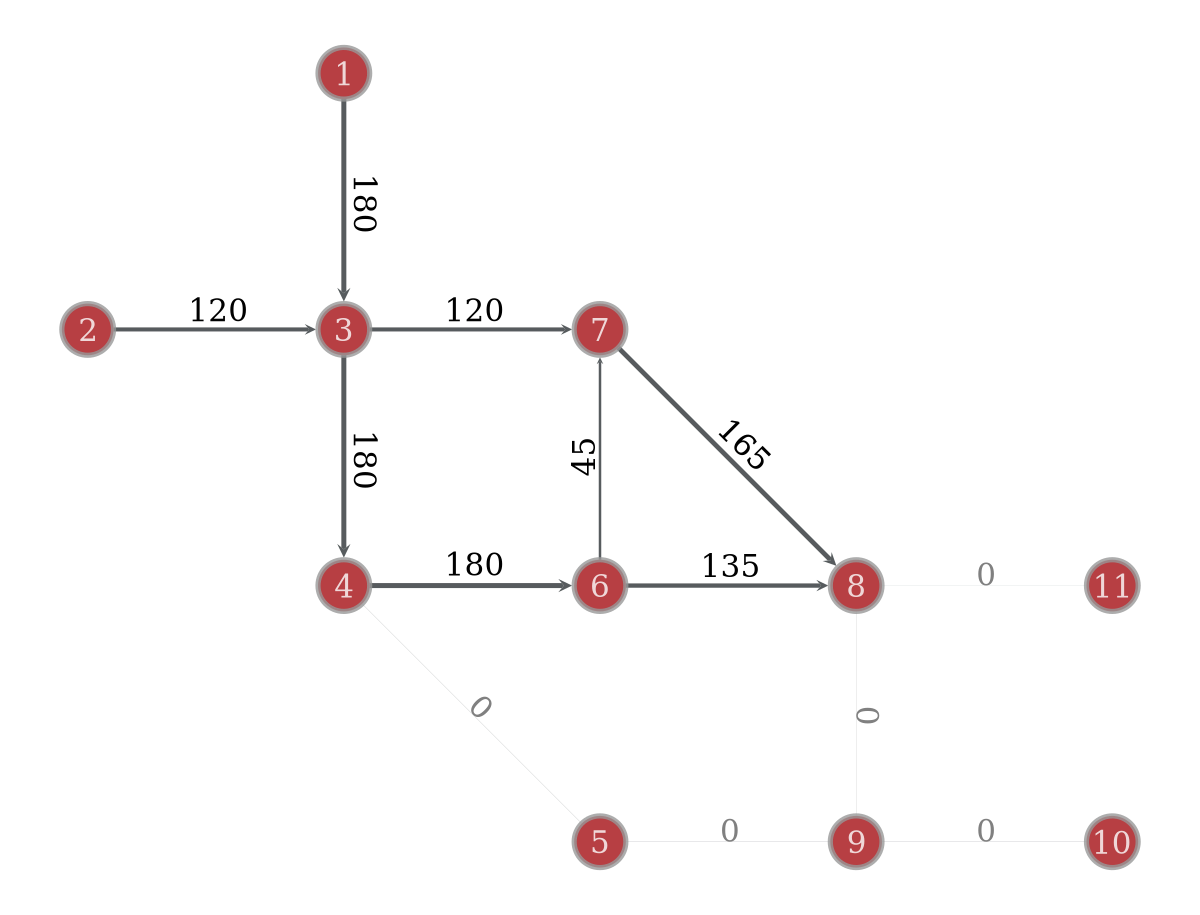

'Graph F'

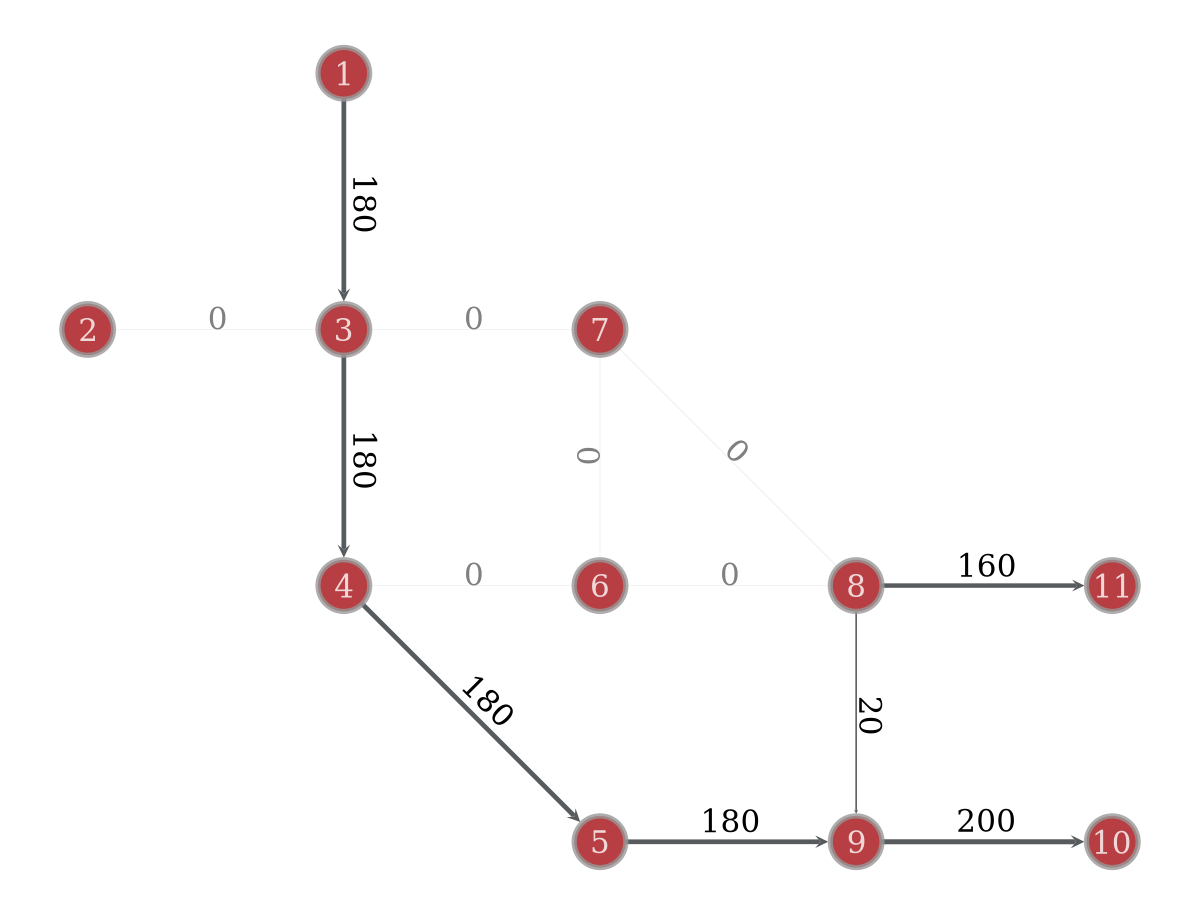

'Graph G'

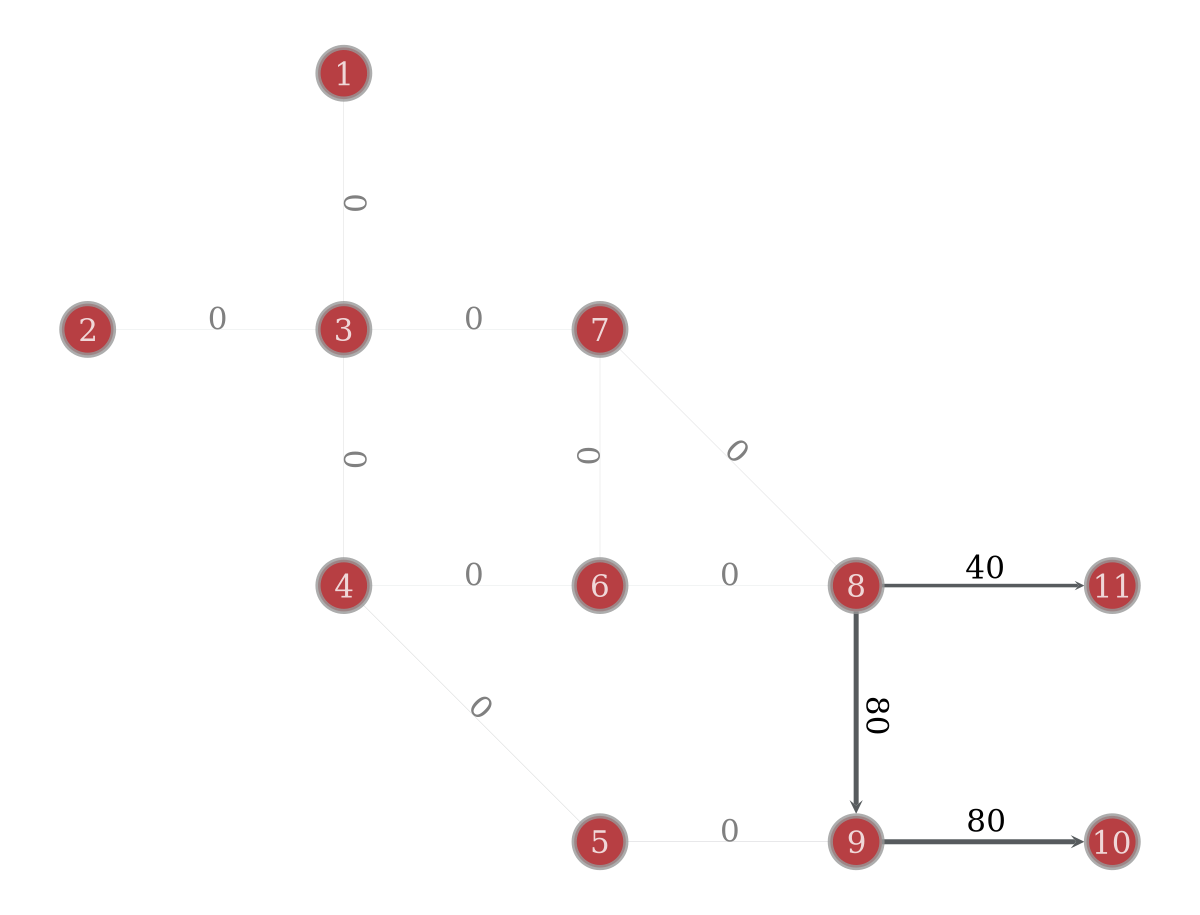

'Graph K'

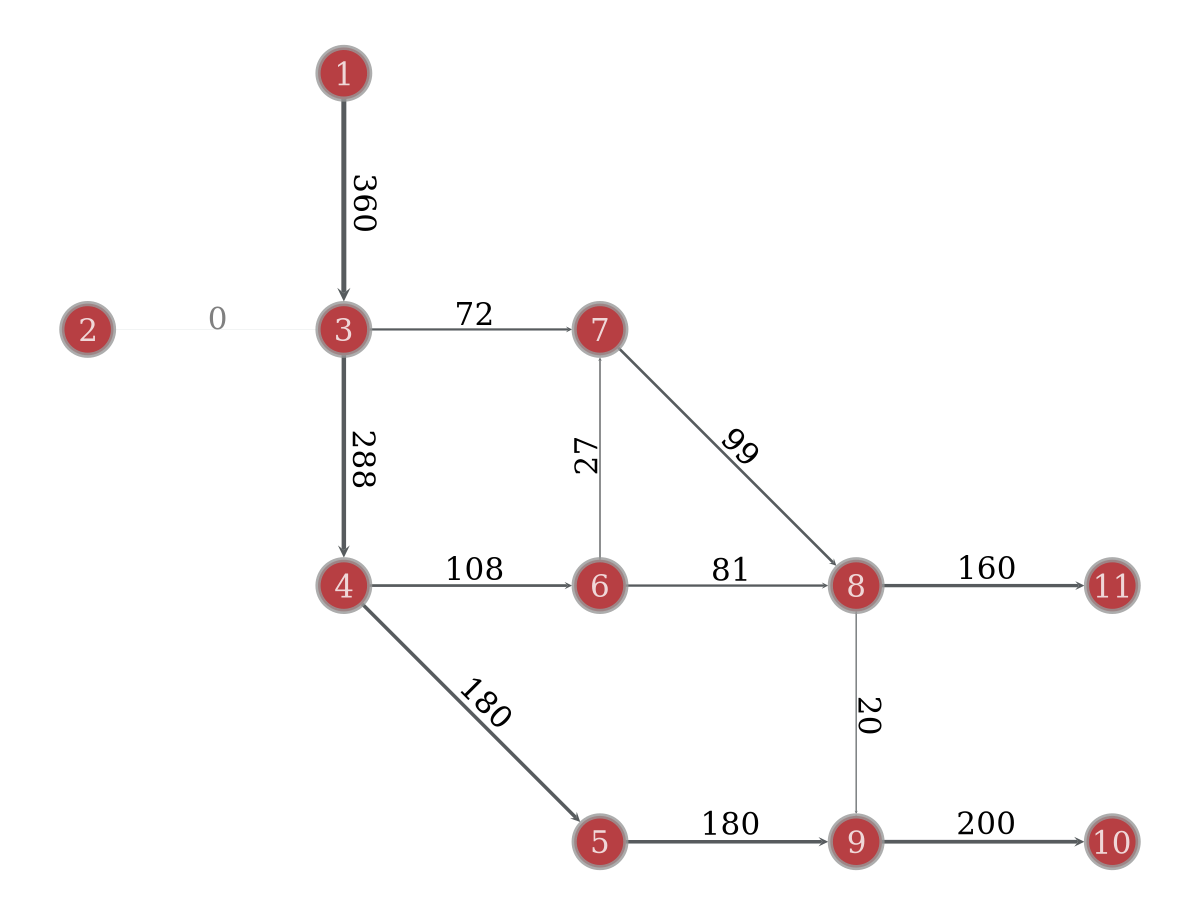

'Graph L'

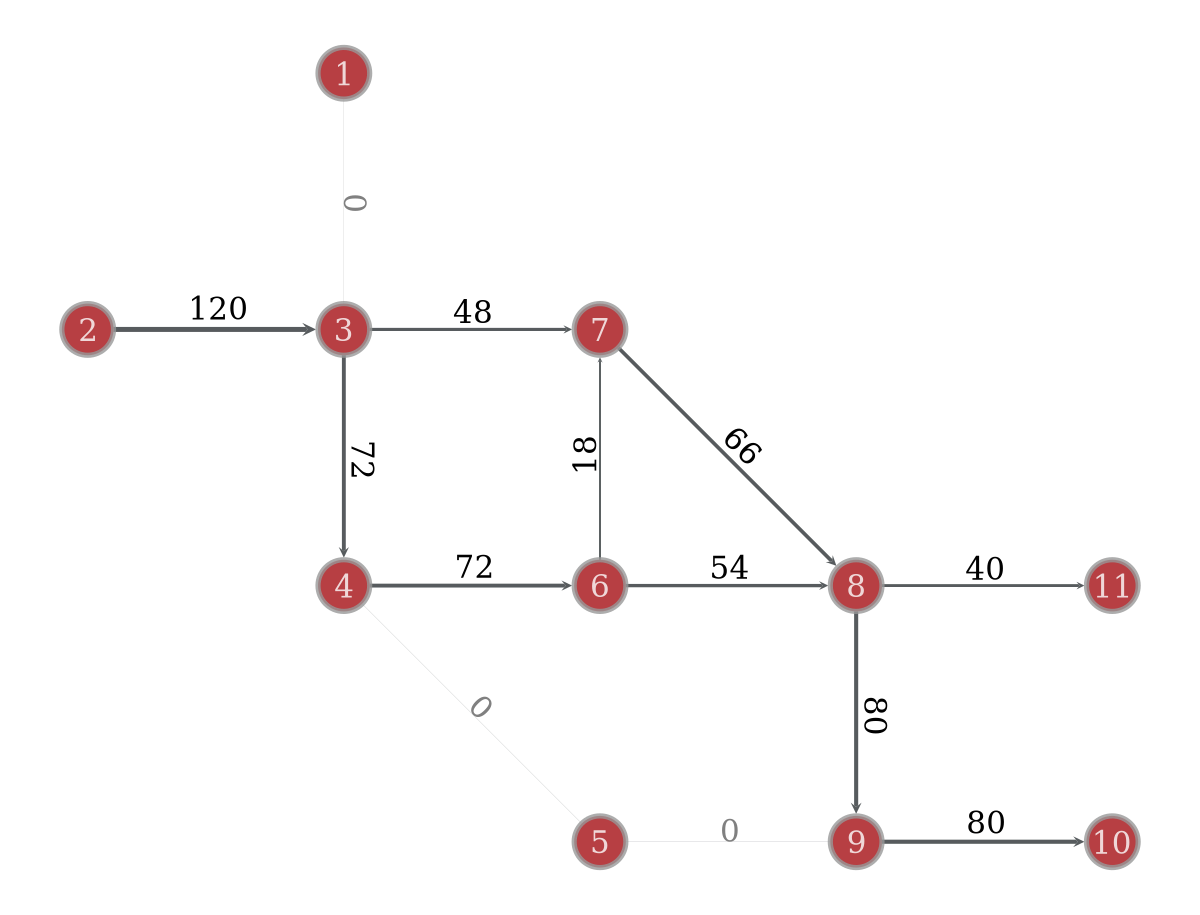

'Figure 1'

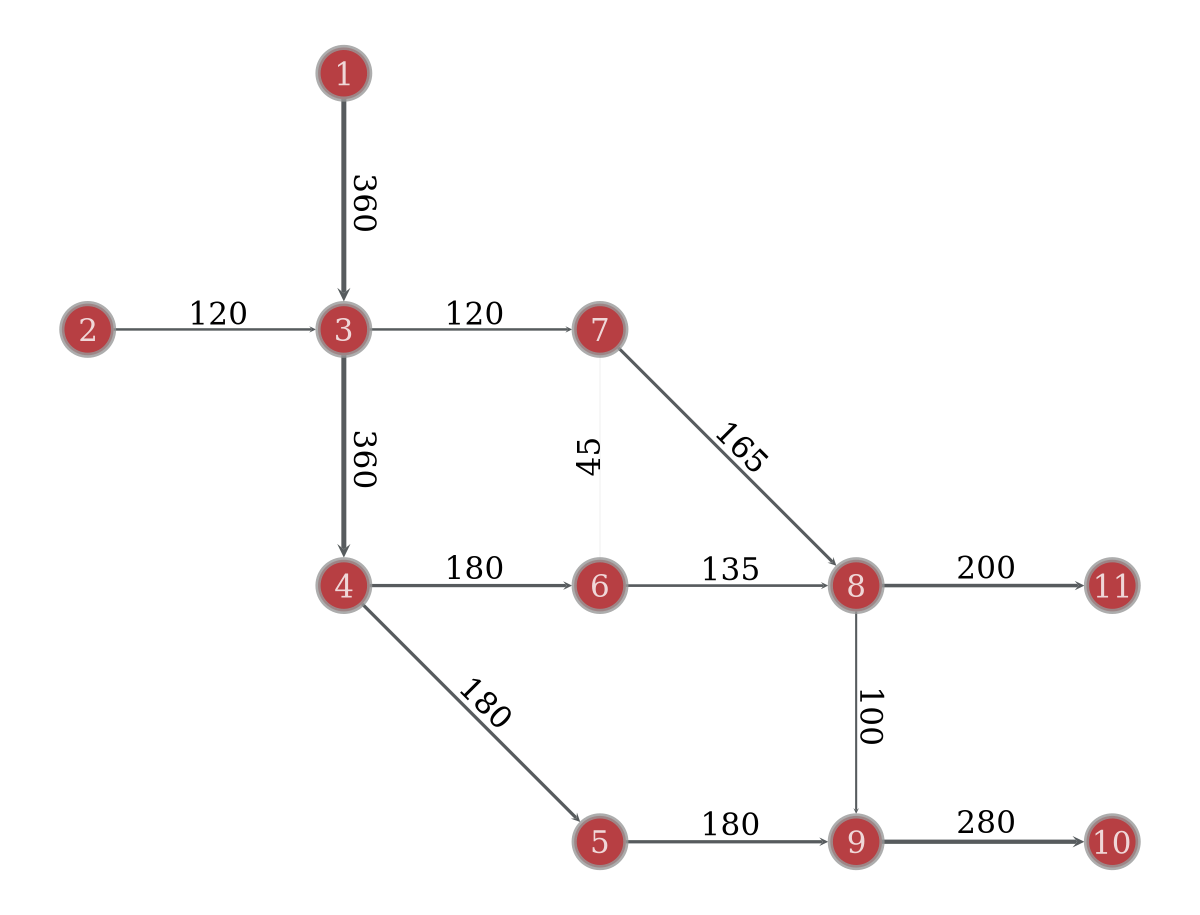

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fda005838c0, at 0x7fda012f0e30>

In [7]:
display("Graph E")
net.draw(flows=x_n)
display("Graph F")
net.draw(flows_by_o=residuals, o=1)
display("Graph G")
net.draw(flows_by_o=residuals, o=2)
display("Graph K")
net.draw(flows_by_o=new_flows, o=1)
display("Graph L")
net.draw(flows_by_o=new_flows, o=2)
display("Figure 1")
net.draw(flows_by_o=new_flows, o="sum")